# Face recognition with ORL

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from utils import load_dataset, image_width, image_height, rotate_image, num_classes
from scipy import misc, ndimage

plt.gray()

## 2 - Upload dataset ##

In [2]:
# Loading the ORL faces dataset
train_X_origin, train_Y, test_X_origin, test_Y = load_dataset(False)

print ("train_X shape: " + str(train_X_origin.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X_origin.shape))
print ("test_Y shape: " + str(test_Y.shape))

train_X shape: (320, 92, 112, 1)
train_Y shape: (320, 1)
test_X shape: (80, 92, 112, 1)
test_Y shape: (80, 1)


In [3]:
# Let's standardize our dataset.
train_X_scaled = np.copy(train_X_origin)/255.
test_X_scaled = np.copy(test_X_origin)/255.

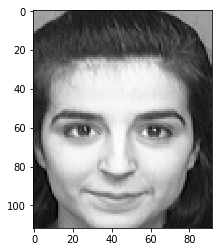

In [4]:
# Example of a picture
index = 11
plt.imshow(np.copy(train_X_scaled)[index].reshape(image_height, image_width))
plt.show()

In [5]:
# Vectorize an image
def image2vector(image):
    """
    Vectorize an image.
    
    Argument:
    image -- a numpy array of shape (num_samples, length, height, depth)
    
    Returns:
    v -- a vector of shape (num_samples, length*height*depth - num_features)
    """
    
    v = np.copy(image).reshape(image.shape[0], -1)

    return v

In [6]:
# Reshape the training and test examples so that images of size (92, 112, 1) are flattened into single vectors
train_X = image2vector(train_X_scaled) 
test_X = image2vector(test_X_scaled) 
print ("flattened train_X: " + str(train_X.shape))
print ("flattened test_X: " + str(test_X.shape))

flattened train_X: (320, 10304)
flattened test_X: (80, 10304)


## 3 -  Classification algorithm ##

In [7]:
#Euclidean distance between 2-dimensional point
def find_euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B)**2))

In [8]:
distance = find_euclidean_distance(train_X[0:1], test_X[0:1])
print("Euclidean distance between first rows: ", distance)

Euclidean distance between first rows:  19.59163


In [9]:
def classify(train_data, train_labels, test_data, n_classes = num_classes, k = 1):
    """
    KNN Classification.
    
    Argument:
    train_data -- a numpy array (dataset) of shape (num_samples, num_features)
    train_labels -- a numpy array (labels) of shape (num_samples, 1 - a label)
    test_data -- a numpy array (dataset) of shape (num_samples, num_features)
    n_classes -- a number of classes in dataset. Default value is 80, as in ORL faces dataset
    k -- a number of nearest neighbors. Default value is 3. 
         When K=1, then the algorithm is known as the nearest neighbor algorithm.
    
    Returns:
    predicted_labels -- a numpy array (labels) of shape (num_samples, 1 - a label). 
                        Predicted_labels for an input test dataset
    
    note: Research has shown that no optimal number of neighbors (k) suits all kind of data sets. 
    Each dataset has it's own requirements. In the case of a small number of neighbors, 
    the noise will have a higher influence on the result, and a large number of neighbors 
    make it computationally expensive. 
    Research has also shown that a small amount of neighbors are most flexible fit 
    which will have low bias but high variance and a large number of neighbors 
    will have a smoother decision boundary which means lower variance but higher bias.
    """
    #Euclidean distance between 2-dimensional point
    test_labels = []
    for test_sample in test_data:
        #Claculate distances between test point and all of the train points
        dist = [ [find_euclidean_distance(test_sample, train_data[i]), train_labels[i][0]] for i in range(train_data.shape[0])]
        #How many points of each class among nearest K
        stat = [0 for i in range(n_classes)]
        
        for d in sorted(dist)[0:k]:
            stat[d[1]] += 1.0
        #Assign a class with the most number of occurences among K nearest neighbours
        test_labels.append( sorted(zip(stat, range(n_classes)), reverse=True)[0][1] )
    predicted_labels = np.array(test_labels).reshape(test_data.shape[0],1)
    return predicted_labels

In [10]:
predicted_Y = classify(train_X, train_Y, test_X)

In [11]:
print(predicted_Y.flatten())
print(test_Y.flatten())
# print(predicted_Y.flatten()[68])
# print(test_Y.flatten()[68])
# show_image = test_X[68]
# print(show_image)
# plt.imshow(np.copy(show_image).reshape(image_height, image_width))
# plt.show()

[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 35 34 35 35
 36 36 37 37 38 38 39 39]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35
 36 36 37 37 38 38 39 39]


In [12]:
def calc_accuracy(X, Y):
    """
    Calculate the model accuracy. Predicted labels vs true ones.
    
    Argument:
    X -- a numpy array (labels) of shape (num_samples, 1 - a label). Usually, it's a matrix of predicted labels.
    Y -- a numpy array (labels) of shape (num_samples, 1 - a label). Usually, it's a matrix of real labels.
    
    Returns:
    accuracy -- a classification accuracy
    """
    accuracy = (np.copy(X) == np.copy(Y)).mean()
    return accuracy

In [13]:
print ("Accuracy: ", calc_accuracy(predicted_Y, test_Y))

Accuracy:  0.9875


## 4 - Image normalization ## 

In [14]:
def normalize(X, axis=0):
    """
    Normalize dataset by features or samples. 
    
    Argument:
    X -- a numpy array (dataset) of shape (num_samples, num_features)
    axis -- an axis along which the normalization is computed. 0 - normalization by features, 
            1 - normalization by samples. Default value is 0
    
    Returns:
    N -- a normalized dataset
    
    - If we have whole dataset we can for each feature in the dataset 
    calculate mean value and subtract it from the feature. 
    - In case of continuously growing dataset like online learning 
    we normalize each observation (face image in our case) separately: 
    calculate mean from data entry (one face image), subtract mean from original image 
    and divide it by standard deviation of the image.

    """
    X = np.copy(X)
    N = (X-X.mean(axis=axis, keepdims=True))/X.std(axis=axis, keepdims=True)
    return N

In [15]:
print('Normalization by samples')
train_X_normalized_by_samples=normalize(train_X, axis=1)
test_X_normalized_by_samples=normalize(test_X, axis=1)
print('Normalization by features')
train_X_normalized_by_features=normalize(train_X, axis=0)
test_X_normalized_by_features=normalize(test_X, axis=0)

Normalization by samples
Normalization by features


In [16]:
predicted_Y_normalized_by_samples = classify(train_X_normalized_by_samples, 
                                             train_Y, 
                                             test_X_normalized_by_samples)

predicted_Y_normalized_by_features = classify(train_X_normalized_by_features, 
                                              train_Y, 
                                              test_X_normalized_by_features)

In [17]:
print ("Accuracy for dataset normalized by samples: ", calc_accuracy(predicted_Y_normalized_by_samples, test_Y))
print ("Accuracy for dataset normalized by features: ", calc_accuracy(predicted_Y_normalized_by_features, test_Y))

Accuracy for dataset normalized by samples:  0.95
Accuracy for dataset normalized by features:  0.9875


**Result table**: 

<style type="text/css">td {text-align:left}</style>
<table style="width:auto">
    <tr>
        <td>  ** Normalization **  </td>
        <td> ** by features ** </td>
        <td> ** by samples ** </td>
        <td> ** no normalization ** </td>
    </tr>
    <tr>
        <td>  ** Accuracy **  </td>
        <td> 98.75% </td>
        <td> 95.0%</td>
        <td> 98.75% </td>
    </tr>
</table>

## 5 - PCA ##

In [18]:
def cov(M):
    '''
    Calculate the covariance matrix.
        
    Argument:
    M -- a numpy array (dataset) of shape (num_samples, num_features)
         Training data, where n_samples is the number of samples and n_features is the number of features.
         
    Returns:
    X -- a numpy array (a covariance matrix)
    '''
    X = np.copy(M)
    X = np.dot(X.T, X)
    return X

# def cov2(M):
#     '''
#     Calculate the covariance matrix
#     note: this mean-centers and auto-scales the data (in-place)
#     '''
#     X = np.copy(M)
#     N = X.shape[0]  
#     return np.dot(X.T, X.conj())/float(N-1)

# def cov3(M):
#     '''
#     Calculate the covariance matrix
#     '''
#     X = np.copy(M)
#     return np.cov(X)

print("Shape of covariance matrix for train_X:", cov(train_X).shape)

Shape of covariance matrix for train_X: (10304, 10304)


In [19]:
def pca(M, num_components = .98):
    """
    Principal component analysis using eigenvalues.
    Linear dimensionality reduction using Singular Value Decomposition of the data 
    to project it to a lower dimensional space.
    
    Argument:
    M -- a numpy array (dataset) of shape (num_samples, num_features)
    num_components -- int, float. Number of components to keep. 
                      If 0 < n_components < 1, select the number of components 
                      such that the amount of variance that needs to be explained is greater 
                      than the percentage specified by n_components.
                      The default value is 0.95.
    
    Returns:
    transform_matrix -- the matrix for dimensionality reduction 
    R -- the matrix (dataset) of shape (num_samples, num_features) which dimensionality has been reduced 
    
    note: this mean-centers and auto-scales the data (in-place).
    """
    
    X = np.copy(M)
    # centralize our data by removing the mean from each value within our dataset
    X = normalize(X, axis=0)
    
    C = cov(X)
    # calculate the eigendecomposition (eigenvalues and eigenvectors of a real symmetric matrix)
    E, V = np.linalg.eigh(C)

    key = None
    if (num_components<1):
        n=X.shape[1]
        p=1
        i=0
        while p>num_components:
            i+=1
            key=np.argsort(-E)[:n-i]
            p=np.sum(E [key])/np.sum(E)
        # calculate the matrix for dimensionality reduction 
        transform_matrix=V[:, key]
    else:
        # calculate the matrix for dimensionality reduction 
        transform_matrix = V
        
    # reduce dimensionality of an input dataset
    R = np.dot(M, transform_matrix)
    return transform_matrix, R

In [35]:
print("Parametrize the PCA algorithm with different values of pca energy (0.95, 0.98, 0.99, and 1.00).\n")
for pca_energy in [0.95, 0.98, 0.99, 1.00]:
#     globals()['transform_matrix_%s' % (pca_energy * 100)], globals()['train_X_reduced_%s' % (pca_energy * 100)], = pca(train_X, pca_energy)
    transform_matrix, train_X_reduced = pca(train_X, pca_energy)
    print("pca_energy =", pca_energy, "the number of components =", train_X_reduced.shape[1])
    print("transformation matrix shape:", transform_matrix.shape)
    print("train_X_reduced shape:", train_X_reduced.shape)
    
    test_X_reduced = np.dot(test_X, transform_matrix)
    print("test_X_reduced shape:", test_X_reduced.shape)
    
    predicted_Y_reduced = classify(train_X_reduced, train_Y, test_X_reduced)
    print ('Accuracy for dataset reduced by PCA (energy %s):' % pca_energy, calc_accuracy(predicted_Y_reduced, test_Y))
    
    print('\n')

Parametrize the PCA algorithm with different values of pca energy (0.95, 0.98, 0.99, and 1.00).

pca_energy = 0.95 the number of components = 166
transformation matrix shape: (10304, 166)
train_X_reduced shape: (320, 166)
test_X_reduced shape: (80, 166)
Accuracy for dataset reduced by PCA (energy 0.95): 0.9875


pca_energy = 0.98 the number of components = 234
transformation matrix shape: (10304, 234)
train_X_reduced shape: (320, 234)
test_X_reduced shape: (80, 234)
Accuracy for dataset reduced by PCA (energy 0.98): 0.9875


pca_energy = 0.99 the number of components = 268
transformation matrix shape: (10304, 268)
train_X_reduced shape: (320, 268)
test_X_reduced shape: (80, 268)
Accuracy for dataset reduced by PCA (energy 0.99): 0.9875


pca_energy = 1.0 the number of components = 10304
transformation matrix shape: (10304, 10304)
train_X_reduced shape: (320, 10304)
test_X_reduced shape: (80, 10304)
Accuracy for dataset reduced by PCA (energy 1.0): 0.9875




**Summary statistics for different values of pca energy**: 

<style type="text/css">td {text-align:left}</style>
<table style="width:auto">
    <tr>
        <td>  ** PCA energy **  </td>
        <td> ** 0.95 ** </td>
        <td> ** 0.98 ** </td>
        <td> ** 0.99 ** </td>
        <td> ** 1.00 ** </td>
        <td> ** no normalization ** </td>
    </tr>
    <tr>
        <td>  ** Accuracy **  </td>
        <td> 98.75% </td>
        <td> 98.75% </td>
        <td> 98.75% </td>
        <td> 98.75% </td>
        <td> 98.75% </td>
    </tr>
    <tr>
        <td>  ** Number of features **  </td>
        <td> 166 </td>
        <td> 234 </td>
        <td> 268 </td>
        <td> 10304 </td>
        <td> 10304 </td>
    </tr>
</table>

In [26]:
transform_matrix, train_X_reduced = pca(train_X, 0.90)

In [32]:
import time

tic1 = time.process_time()
predicted_Y_reduced = classify(train_X, train_Y, test_X)
toc1 = time.process_time()
print ("Classify test dataset with original dimensionality:\n ----- Computation time = " + str(1000*(toc1 - tic1)) + "ms")

tic2 = time.process_time()
# train_X_reduced = np.dot(train_X, transform_matrix)
test_X_reduced = np.dot(test_X, transform_matrix)
predicted_Y_reduced = classify(train_X_reduced, train_Y, test_X_reduced)
toc2 = time.process_time()
print ("Transform and classify test dataset with reduced dimensionality:\n ----- Computation time = " + str(1000*(toc2 - tic2)) + "ms")

Classify test dataset with original dimensionality:
 ----- Computation time = 331.31629399986195ms
Transform and classify test dataset with reduced dimensionality:
 ----- Computation time = 631.8893370003025ms


## 6 - Image alignment ##

Original Image:  (112, 92)


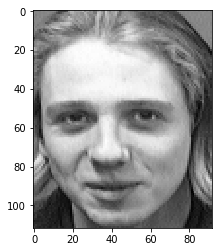

Rotated Image:  (112, 92)


/home/eugene/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


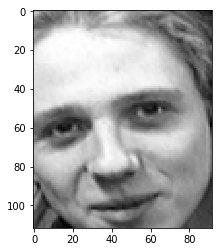

Done


In [33]:
image = train_X_origin[30].reshape(image_height, image_width)
angle = 10

image_orig = np.copy(image)
# image_height, image_width = image_orig.shape[0:2]

print("Original Image: ", image.shape)
plt.imshow(image)
plt.show()
image_rotated = rotate_image(image, angle)
print("Rotated Image: ", image_rotated.shape)
plt.imshow(image_rotated)
plt.show()

print("Done")

Original Image:  (112, 92)


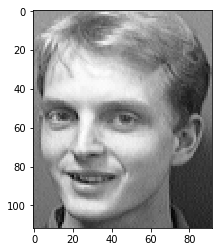

Rotated Image:  (112, 92)


/home/eugene/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


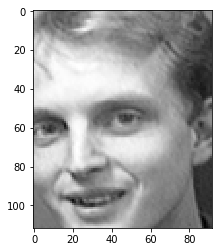

True class: 34
Predicted class: 35
New predicted class after rotation: 35


In [34]:
image_origin = test_X[68]
image_origin = np.copy(image_origin).reshape(image_height, image_width)
print("Original Image: ", image_origin.shape)
plt.imshow(image_origin)
plt.show()

image_rotated = rotate_image(np.copy(image_origin), angle)
print("Rotated Image: ", image_rotated.shape)
plt.imshow(image_rotated)
plt.show()


# print(predicted_Y.flatten())
# print(test_Y.flatten())
print("True class:", test_Y.flatten()[68])
print("Predicted class:", predicted_Y.flatten()[68])
test_X_rotated = np.copy(image_rotated).reshape(1, image_rotated.shape[0]*image_rotated.shape[1])
predicted_Y_rotated = classify(train_X, train_Y, test_X_rotated)
print("New predicted class after rotation:", predicted_Y_rotated.flatten()[0])